In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("housing.csv")

In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
data.dropna(inplace=True) 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [7]:
from sklearn.model_selection import train_test_split

# Split data into X - the data we are using and y the column we are predicting
X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [8]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [9]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
train_data = X_train.join(y_train)

In [12]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
7408,-118.22,33.96,35.0,1437.0,474.0,2113.0,484.0,2.6179,<1H OCEAN,158800.0
10721,-117.82,33.65,18.0,2105.0,302.0,830.0,286.0,6.3822,<1H OCEAN,362500.0
17703,-121.82,37.31,22.0,2044.0,402.0,1925.0,429.0,3.7102,<1H OCEAN,177500.0
5000,-118.28,33.99,49.0,2174.0,481.0,1861.0,484.0,1.7159,<1H OCEAN,95000.0
8581,-118.41,33.89,31.0,702.0,161.0,236.0,144.0,5.0497,<1H OCEAN,500001.0
...,...,...,...,...,...,...,...,...,...,...
7016,-118.08,33.97,36.0,1678.0,323.0,1380.0,352.0,3.5481,<1H OCEAN,163300.0
7267,-118.22,33.98,34.0,2283.0,809.0,3032.0,832.0,2.4387,<1H OCEAN,175000.0
3259,-122.90,39.23,39.0,1295.0,240.0,534.0,179.0,3.9519,INLAND,98900.0
6276,-117.93,34.01,33.0,1733.0,361.0,1757.0,375.0,4.2266,<1H OCEAN,153800.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

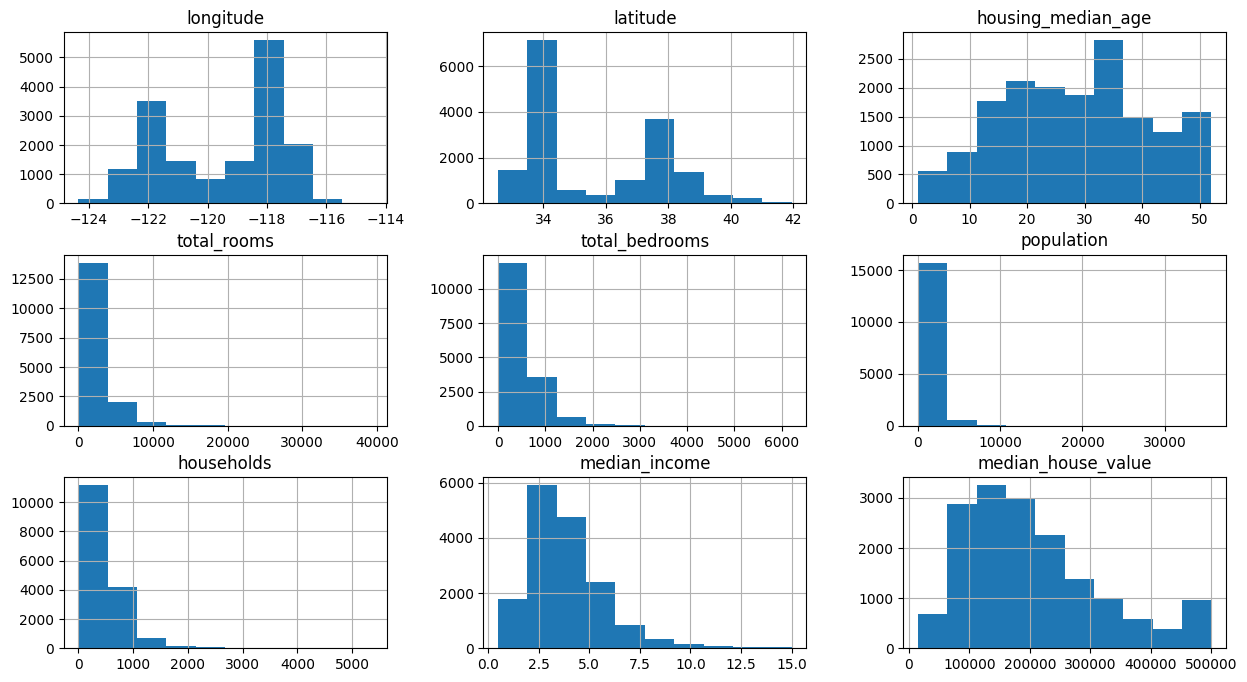

In [13]:
train_data.hist(figsize=(15, 8))

In [14]:
train_data.corr(numeric_only=True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925039,-0.105070,0.040574,0.065897,0.098364,0.052805,-0.015893,-0.046381
latitude,-0.925039,1.000000,0.006956,-0.030919,-0.062366,-0.105601,-0.067392,-0.078489,-0.143292
housing_median_age,-0.105070,0.006956,1.000000,-0.363036,-0.320770,-0.297107,-0.303839,-0.120086,0.107174
total_rooms,0.040574,-0.030919,-0.363036,1.000000,0.928838,0.855060,0.917098,0.201577,0.137402
total_bedrooms,0.065897,-0.062366,-0.320770,0.928838,1.000000,0.876096,0.979803,-0.006802,0.051386
population,0.098364,-0.105601,-0.297107,0.855060,0.876096,1.000000,0.905396,0.007480,-0.022646
households,0.052805,-0.067392,-0.303839,0.917098,0.979803,0.905396,1.000000,0.014751,0.066893
median_income,-0.015893,-0.078489,-0.120086,0.201577,-0.006802,0.007480,0.014751,1.000000,0.690262
median_house_value,-0.046381,-0.143292,0.107174,0.137402,0.051386,-0.022646,0.066893,0.690262,1.000000


<Axes: >

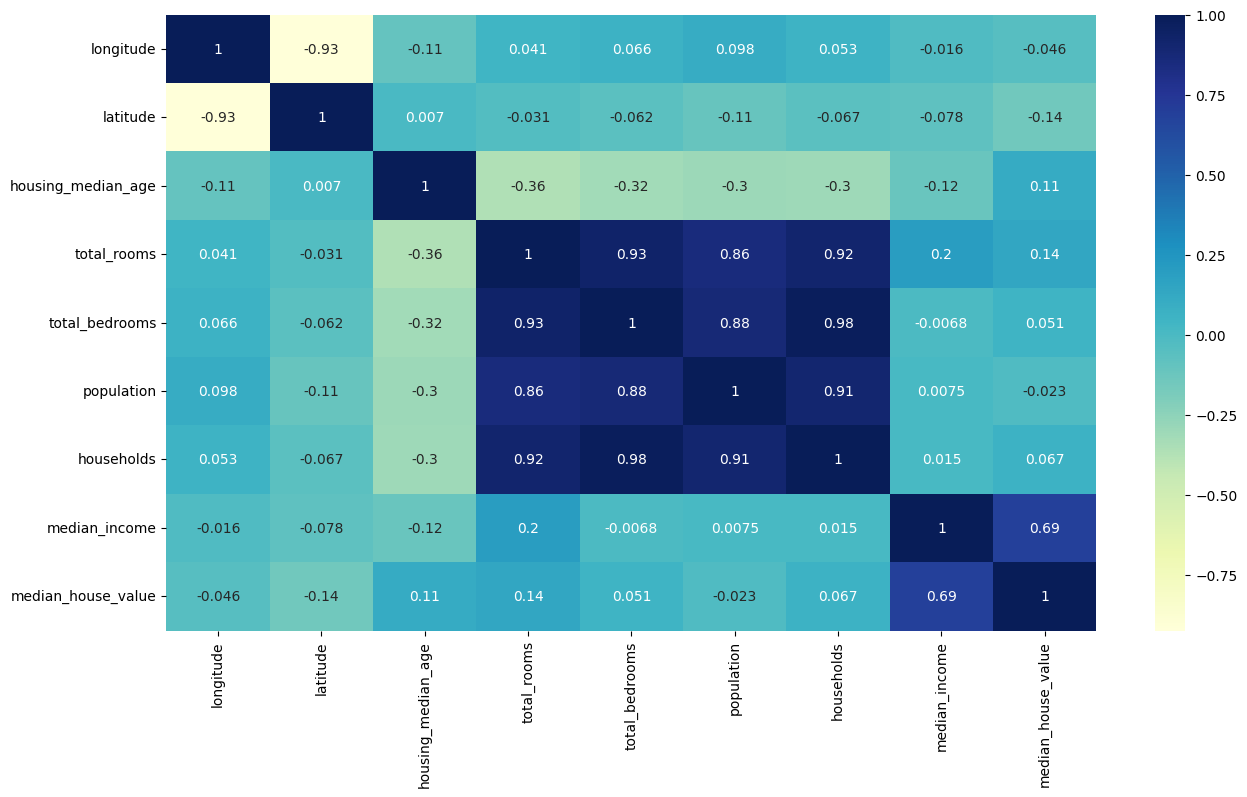

In [15]:
plt.figure(figsize=(15,8))
# sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap="crest")
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap="YlGnBu")

In [16]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

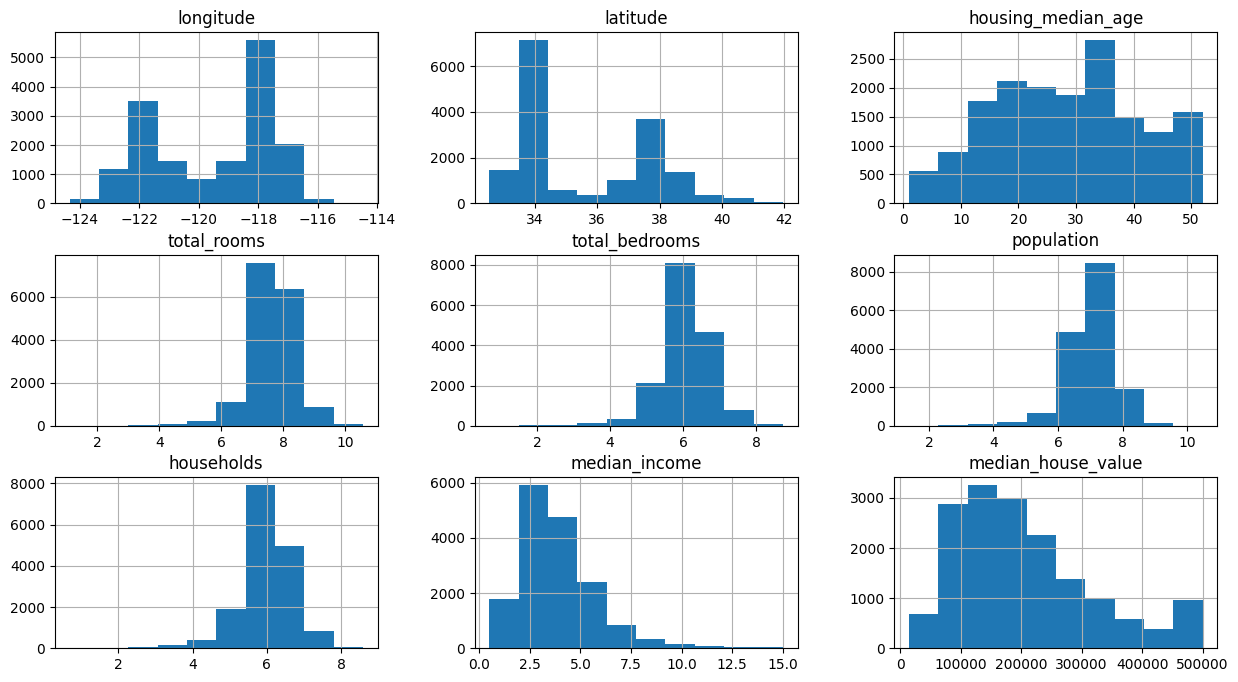

In [17]:
train_data.hist(figsize=(15,8))

In [18]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7238
INLAND        5176
NEAR OCEAN    2125
NEAR BAY      1802
ISLAND           5
Name: count, dtype: int64

In [19]:
# one hot encoding of ocean_proximity 
pd.get_dummies(train_data.ocean_proximity)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
7408,True,False,False,False,False
10721,True,False,False,False,False
17703,True,False,False,False,False
5000,True,False,False,False,False
8581,True,False,False,False,False
...,...,...,...,...,...
7016,True,False,False,False,False
7267,True,False,False,False,False
3259,False,True,False,False,False
6276,True,False,False,False,False


In [20]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity, dtype=int)).drop(['ocean_proximity'], axis=1)

In [21]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
7408,-118.22,33.96,35.0,7.271009,6.163315,7.656337,6.184149,2.6179,158800.0,1,0,0,0,0
10721,-117.82,33.65,18.0,7.652546,5.713733,6.722630,5.659482,6.3822,362500.0,1,0,0,0,0
17703,-121.82,37.31,22.0,7.623153,5.998937,7.563201,6.063785,3.7102,177500.0,1,0,0,0,0
5000,-118.28,33.99,49.0,7.684784,6.177944,7.529406,6.184149,1.7159,95000.0,1,0,0,0,0
8581,-118.41,33.89,31.0,6.555357,5.087596,5.468060,4.976734,5.0497,500001.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7016,-118.08,33.97,36.0,7.425954,5.780744,7.230563,5.866468,3.5481,163300.0,1,0,0,0,0
7267,-118.22,33.98,34.0,7.733684,6.697034,8.017308,6.725034,2.4387,175000.0,1,0,0,0,0
3259,-122.90,39.23,39.0,7.167038,5.484797,6.282267,5.192957,3.9519,98900.0,0,1,0,0,0
6276,-117.93,34.01,33.0,7.458186,5.891644,7.471932,5.929589,4.2266,153800.0,1,0,0,0,0


<Axes: >

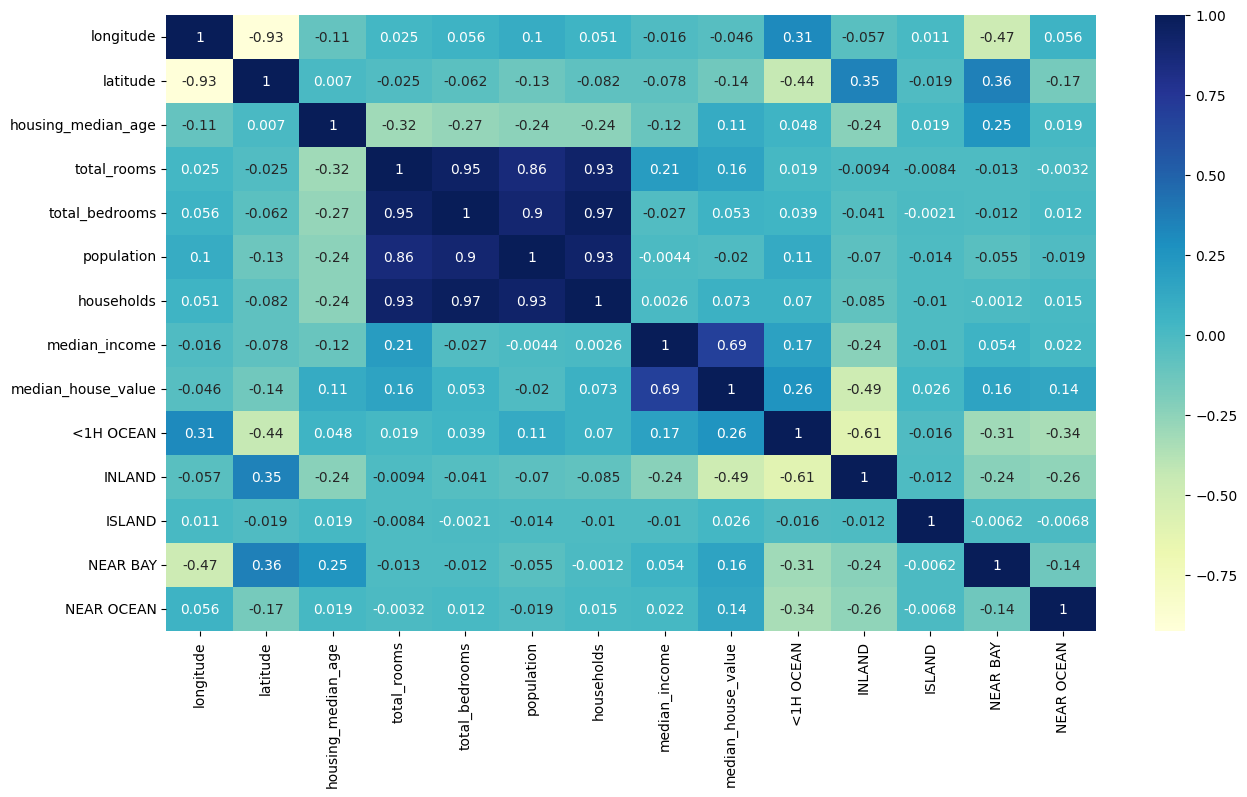

In [22]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

<Axes: >

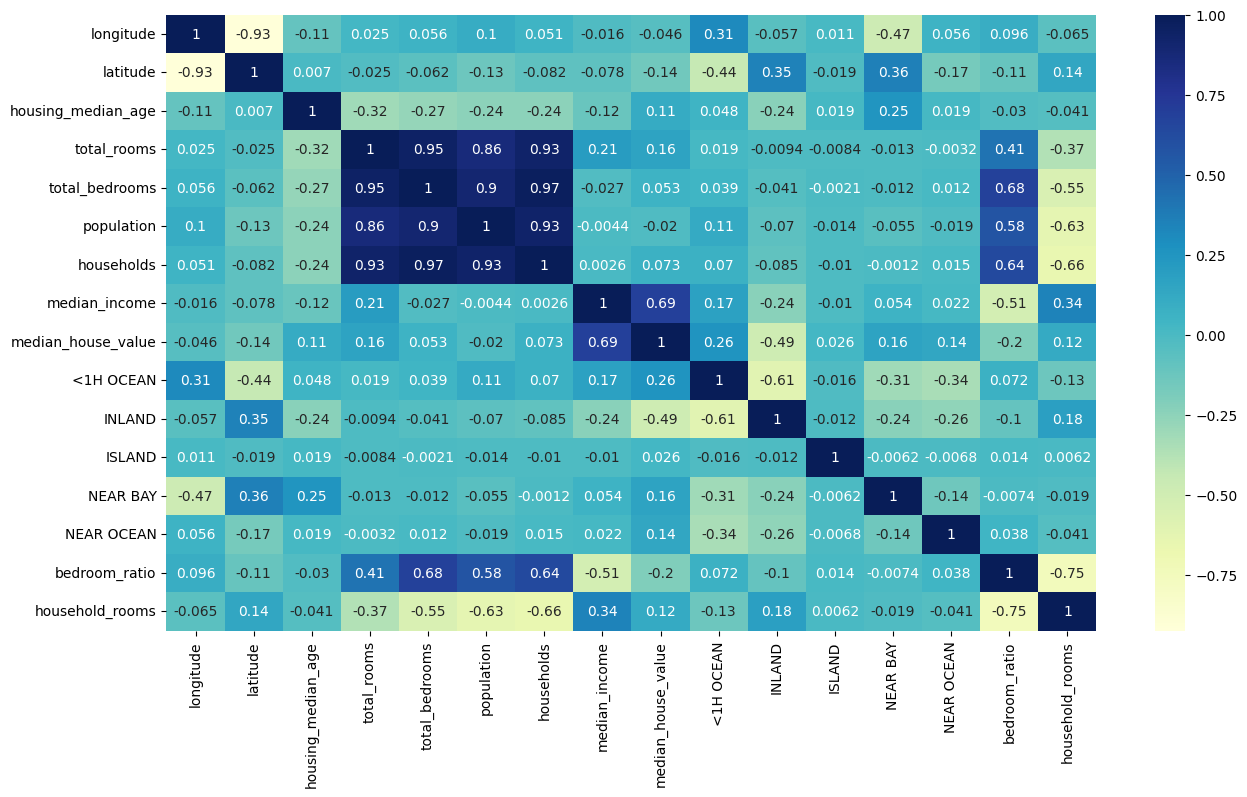

In [23]:
# Feature engineering
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']
### TODO: Will be experimenting with a population per household or vice versa
# train_data['population_households'] = train_data['households'] / train_data['population']

plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

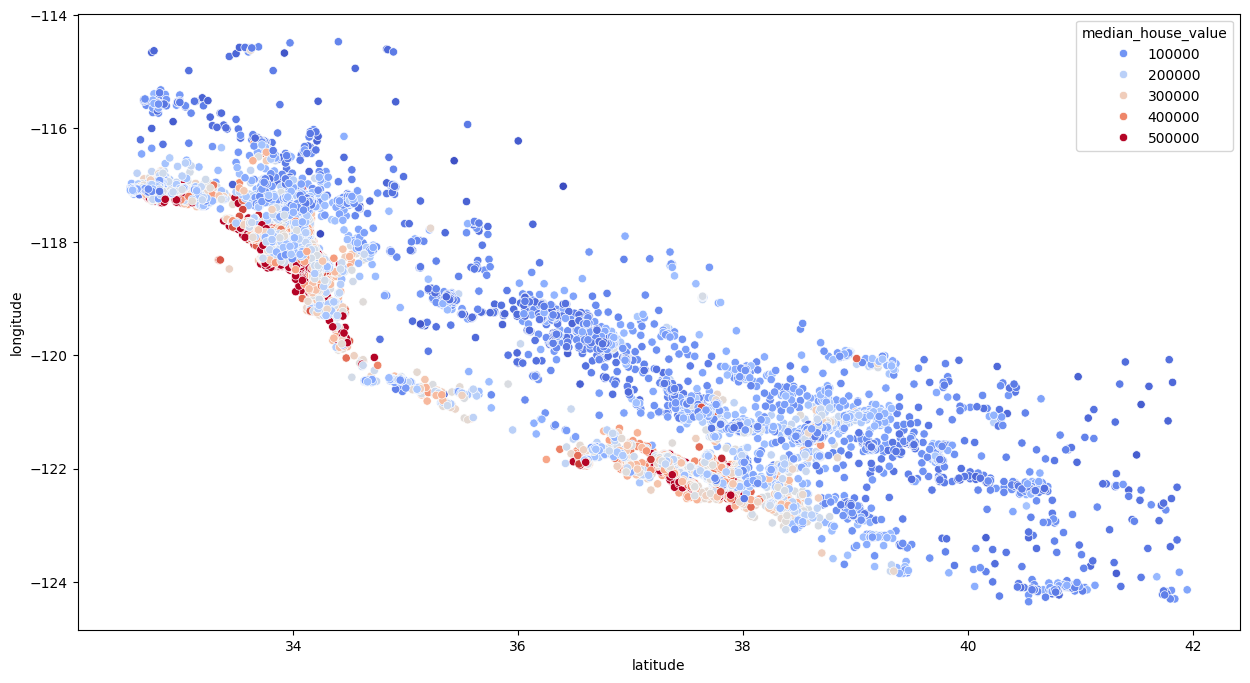

In [24]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm")

In [25]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler();

X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [26]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity, dtype=int)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']
X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [27]:
reg.score(X_test, y_test)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- ISLAND


In [ ]:
X_train_s = scaler.fit_transform(X_train)
reg.fit(X_train_s, y_train)

X_test_s = scaler.transform(X_test) #, scaler.transform(y_test)

In [ ]:
reg.score(X_test_s, y_test)

In [ ]:
# Random Forest Model

from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_jobs=-1)

forest.fit(X_train, y_train)

In [ ]:
forest.score(X_test, y_test)

In [ ]:
forest.fit(X_train_s, y_train)

In [ ]:
forest.score(X_test_s, y_test)

In [ ]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [100, 200, 300],
    "min_samples_split": [2, 4],
    "max_depth": [None, 4, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5, 
                           scoring="neg_mean_squared_error", 
                           return_train_score=True)

grid_search.fit(X_train_s, y_train)

In [ ]:
grid_search.best_estimator_

In [ ]:
grid_search.best_estimator_.score(X_test_s, y_test)